<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head(20)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
9,10,Prof,B,18,18,Female,129000


In [6]:
df.tail()
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [7]:
# Mean of all salaries
df.mean()

Unnamed: 0          199.000000
yrs.since.phd        22.314861
yrs.service          17.614610
salary           113706.458438
dtype: float64

In [ ]:
# Median of all salaries
df.median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [8]:
data = df[["sex","salary"]]
data

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [9]:
df
df_male = df[df['sex'] == 'Male']
male = df_male.median()

In [11]:
df_male.groupby(['sex'])['salary'].median()

sex
Male    108043
Name: salary, dtype: int64

Finding the Median salary for all females

In [15]:
df_female = df[df['sex'] == 'Female']
df_female.median()

Unnamed: 0          149.0
yrs.since.phd        17.0
yrs.service          10.0
salary           103750.0
dtype: float64

Comparing the Mean salary of Males and Females

In [17]:
df_diff = df_male.median()- df_female.median() 
df_diff

Unnamed: 0       0.0
yrs.since.phd    0.0
yrs.service      0.0
salary           0.0
dtype: float64

In [ ]:
# The difference between mean salaries of male and female


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [18]:
exp_20 = df[df['yrs.service'] >= 20]
exp_20.head(8)
exp_20.mean()
print(exp_20)

     Unnamed: 0  rank discipline  yrs.since.phd  yrs.service   sex  salary
3             4  Prof          B             45           39  Male  115000
4             5  Prof          B             40           41  Male  141500
6             7  Prof          B             30           23  Male  175000
7             8  Prof          B             45           45  Male  147765
8             9  Prof          B             21           20  Male  119250
..          ...   ...        ...            ...          ...   ...     ...
384         385  Prof          A             27           21  Male  125192
386         387  Prof          A             29           27  Male  139219
388         389  Prof          A             38           36  Male  119450
392         393  Prof          A             33           30  Male  103106
394         395  Prof          A             42           25  Male  101738

[157 rows x 7 columns]


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [20]:
mean20 =np.round(np.mean(df[df["yrs.service"] >=20]["salary"]),1)

mean_under20 =np.round(np.mean(df[df["yrs.service"] <20]["salary"]),1)

r_mean_diff = mean20 -mean_under20
r_mean_diff

14580.199999999997

People who have salary of greater than or equal to 200,000

In [21]:
greater_than200k = df[df["salary"]>=200000]


Your Findings here...


# Rename values, subset columns, etc

In [22]:
df_newname = df.rename(columns={"Unnamed: 0": "Count"}) # change column
df_newname

,Count,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

[Text(0, 0.5, 'yrs ser'), Text(0.5, 0, 'Salary')]

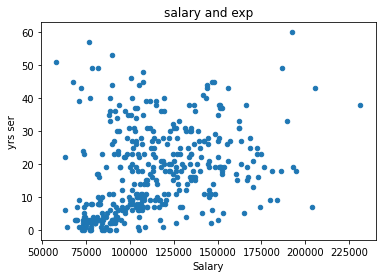

In [25]:
hist_=df.plot(kind="scatter", x ="salary", y="yrs.service", title = "salary and exp")
hist_.set(xlabel= "Salary", ylabel= "yrs ser")



Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here...



I also discovered that the -

 Your Findings here...



